# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
raw_data = pd.read_csv("Categorical.csv")
data = raw_data.copy()
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

In [6]:
data.continent.unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [7]:
data['continent'] = data['continent'].map({
    'North America':0, 'Asia':1, 'Africa':2, 'Europe':3, 'South America':4,
    'Oceania':5, 'Antarctica':6, 'Seven seas (open ocean)':7
})
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [10]:
x = data.iloc[:, 3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,5
237,1
238,2
239,2


## Clustering

Use 4 clusters initially.

In [25]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans()

## Clustering results

In [26]:
clusters = kmeans.fit_predict(x)
clusters

array([4, 0, 3, 4, 1, 1, 1, 0, 6, 0, 2, 7, 2, 5, 4, 2, 1, 0, 3, 1, 3, 3,
       0, 1, 0, 4, 4, 1, 4, 1, 4, 4, 6, 6, 4, 0, 0, 3, 3, 1, 6, 0, 3, 3,
       3, 3, 2, 6, 3, 3, 4, 4, 4, 4, 0, 0, 1, 1, 3, 4, 1, 4, 3, 6, 3, 3,
       1, 1, 3, 1, 2, 6, 1, 1, 2, 3, 1, 0, 1, 3, 3, 3, 3, 3, 1, 4, 4, 4,
       2, 6, 0, 5, 4, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 0, 1, 0, 1, 4, 1, 0,
       0, 0, 0, 3, 0, 0, 2, 4, 0, 1, 0, 0, 0, 3, 3, 4, 1, 0, 3, 1, 1, 1,
       0, 4, 3, 1, 1, 3, 5, 4, 2, 1, 3, 1, 0, 1, 0, 2, 3, 3, 4, 5, 3, 0,
       3, 2, 3, 2, 3, 4, 2, 1, 1, 0, 2, 2, 0, 0, 4, 2, 6, 0, 2, 2, 1, 4,
       0, 1, 6, 0, 2, 0, 1, 1, 3, 3, 0, 3, 3, 3, 0, 5, 5, 2, 3, 4, 1, 3,
       3, 4, 1, 3, 6, 1, 1, 1, 3, 4, 5, 0, 4, 3, 3, 0, 0, 0, 0, 2, 4, 3,
       0, 0, 3, 3, 1, 6, 4, 0, 1, 4, 6, 4, 4, 0, 2, 2, 2, 0, 3, 3, 3])

In [27]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,4
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,4
4,Albania,20.049834,41.142450,3,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,1,0
238,South Africa,25.083901,-29.000341,2,3
239,Zambia,27.774759,-13.458242,2,3


## Plot the data

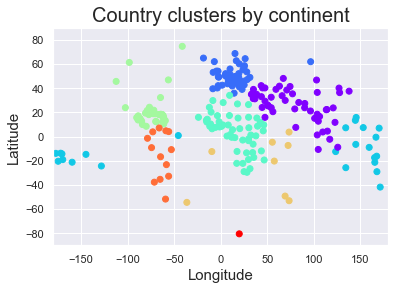

In [28]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap="rainbow")
plt.title("Country clusters by continent", fontsize=20)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.